In [2]:
import matplotlib.pyplot as plt
import numpy as np
import math

In [3]:
def draw(Ox, Oy: list[list], name: str, scatter: bool = False):
    f = plt.figure(figsize=(7, 7))
    px1 = f.add_subplot(111)
    if not scatter:
        for y in Oy:
            px1.plot(Ox, y, label=name)
    else:
        for y in Oy:
            px1.scatter(Ox, y, label=name)
    px1.legend()
    f.show()

In [4]:
def fx(xvn, yvn, a):
    # print(xvn, yvn)
    return -a*((xvn**3)/3-xvn)+a*yvn
    # return -a*((xvn**3)/3-xvn)-a*yvn


def fy(xvn, yvn, c, b):
    return -xvn + c - b*yvn
    # return -xvn


In [5]:
def newtonsMethod(a, c, T, y, b, x):
    l = [x]
    for i in range(100):
        xn = l[-1]
        f = -xn+(-a*(xn**3/3-xn)+a*((-xn+c)*T+y)/(1+b*T))*T+x
        g = -1+a*T*(-T/(b*T+1)-xn**2+1)
        l.append(l[-1] - f/g)
    return l[-1]

In [6]:
def explicit_method(T, a, xvn, yvn, c, b):
    xn1 = T*fx(xvn, yvn, a) + xvn
    yn1 = T*fy(xvn, yvn, c, b) + yvn
    return (xn1, yn1)

In [7]:
def implicit_method(T, a, xvn, yvn, c, b):
    xn2 = newtonsMethod(a, c, T, yvn, b, xvn)
    yn2 = (T*(-xn2+c) + yvn)/(1+b*T)
    return (xn2, yn2)

In [8]:
def explicit4_method(T, a, xvn, yvn, c, b):
    kx1 = fx(xvn, yvn, a)
    kx2 = fx(xvn + T/2*kx1, yvn + T/2, a)
    kx3 = fx(xvn + T/2*kx2, yvn + T/2, a)
    kx4 = fx(xvn + T*kx3, yvn + T, a)
    xn = xvn + T/6*(kx1 + 2 * kx2 + 2 * kx3 + kx4)

    ky1 = fy(xvn, yvn, c, b)
    ky2 = fy(xvn + T/2, yvn + T/2 * ky1, c, b)
    ky3 = fy(xvn + T/2, yvn + T/2 * ky2, c, b)
    ky4 = fy(xvn + T/2, yvn + T * ky3, c, b)
    yn = yvn + T/6*(ky1 + 2 * ky2 + 2 * ky3 + ky4)
    
    return (xn, yn)

In [9]:
def explicit5_method(T, a, xvn, yvn, c, b):
    kx1 = fx(xvn, yvn, a)
    kx2 = fx(xvn + 1/4 * T * kx1,
             yvn + 3/2 * T, a)
    if xvn + (3/32 * kx1 + 9/32 * kx2) * T > 10:
        print(xvn + (3/32 * kx1 + 9/32 * kx2) * T)
    kx3 = fx(xvn + (3/32 * kx1 + 9/32 * kx2) * T,
             yvn + 3/8 * T, a)
    kx4 = fx(xvn + (1932/2197 * kx1 - 
             7200/2197 * kx2 + 7296/2197 * kx3) * T,
             yvn + 12/13 * T, a)
    kx5 = fx(xvn + (439/216 * kx1 - 8 * kx2
                    + 3680/513 * kx3 - 845/4104 * kx4) * T,
                    yvn + T, a)
    kx6 = fx(xvn + (-8/27 * kx1 + 2 * kx2 - 3544/2565 * kx3
                    + 1859/4104 * kx4 + 11/40 * kx5) * T,
                    yvn + 1/2 * T, a)
    xn = xvn + (16/135 * kx1 + 6656/12825 * kx3
                + 28561/56430 * kx4 + 2/55 * kx5
                - 9/50 * kx6) * T
    
    ky1 = fy(xvn, yvn, c, b)
    ky2 = fy(xvn + 3/2 * T,
             yvn + 1/4 * T * ky1, c, b)
    ky3 = fy(xvn + 3/8 * T,
             yvn + (3/32 * ky1 + 9/32 * ky2) * T, c, b)
    ky4 = fy(xvn + 12/13 * T, yvn + (1932/2197 * ky1 - 
            7200/2197 * ky2 + 7296/2197 * ky3) * T, c, b)
    ky5 = fy(xvn + T, yvn + (439/216 * ky1 - 8 * ky2
             + 3680/513 * ky3 - 845/4104 * ky4) * T, c, b)
    ky6 = fy(xvn + 1/2 * T,
             yvn + (-8/27 * ky1 + 2 * ky2 - 3544/2565 * ky3
             + 1859/4104 * ky4 + 11/40 * ky5) * T, c, b)
    yn = yvn + (16/135 * ky1 + 6656/12825 * ky3
                + 28561/56430 * ky4 + 2/55 * ky5
                - 9/50 * ky6) * T

    return (xn, yn)

In [10]:
# новый шаг
def get_p(array):
    s = sum([i ** 2 for i in array])
    return math.sqrt(s)

def new_T(last_T, T0, array, array_prev, L):
    p = get_p(array)
    F = [i / p for i in array]
    # print(sum([i ** 2 for i in F]))
    p_prev = get_p(array_prev)
    F_prev = [i / p_prev for i in array_prev]
    X = [(F[i] - F_prev[i]) / last_T for i in range(len(F))]
    XX = sum([i ** 2 for i in X])
    new_T = T0/(1 + math.sqrt(L) * XX ** (1/4))
    # print(new_T)
    return new_T 

In [11]:
def do_method(method, t_start, t_finish, tl, array, veriables):
    T0, T, a, b, c = [i for i in veriables]
    array_T = [T]
    array_dif = [(fx(array[-1][0], array[-1][1], a),
                    fy(array[-1][0], array[-1][1], c, b))]
    while tl[-1] <= t_finish:
        array.append(method(T, a, array[-1][0], array[-1][1], c, b))
        array_dif.append((fx(array[-1][0], array[-1][1], a),
                fy(array[-1][0], array[-1][1], c, b)))
        T = new_T(array_T[-1], T0, array[-1], array[-2], t_finish - t_start)
        array_T.append(T)
        tl.append(tl[-1] + T)
    return (tl, array, array_dif)

$x' = -a(\frac{x^3}{3} - x) - ay$\
$y' = -x - by + c$\
$x(0) = 2,\quad y(0) = 0$\
Здесь 1 $\leq$ _a_ $\leq$ 10^3, 0 < _c_ < 1.
Провести исследование поведения решений в зависимости от значений «большого» параметра _a_.


/tmp/ipykernel_10576/182673695.py:11: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  f.show()
/tmp/ipykernel_10576/182673695.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  f = plt.figure(figsize=(7, 7))


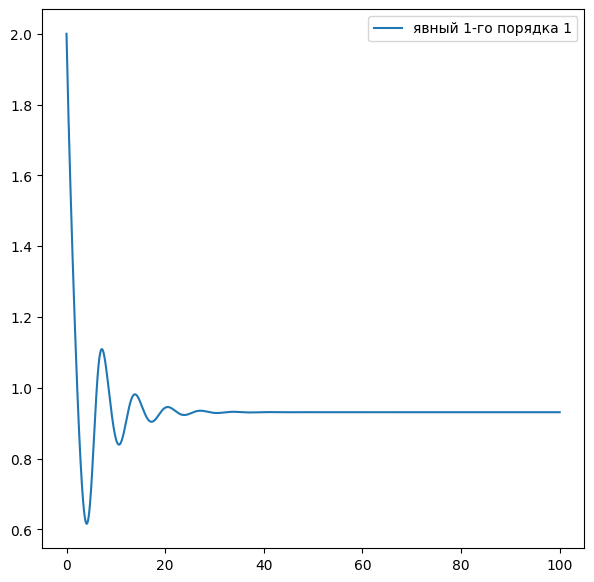

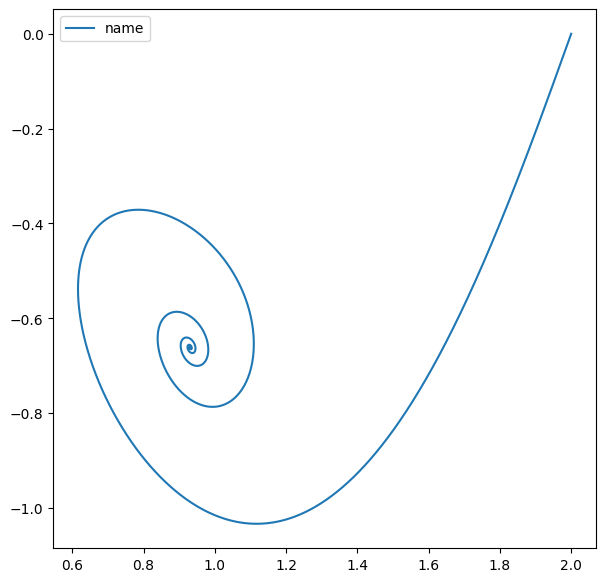

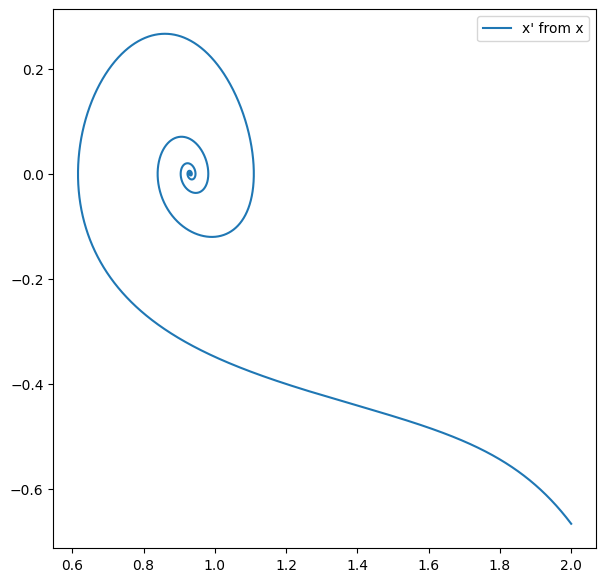

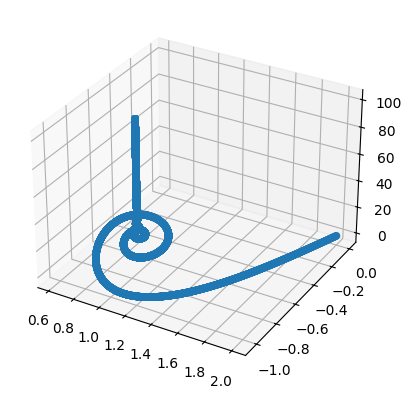

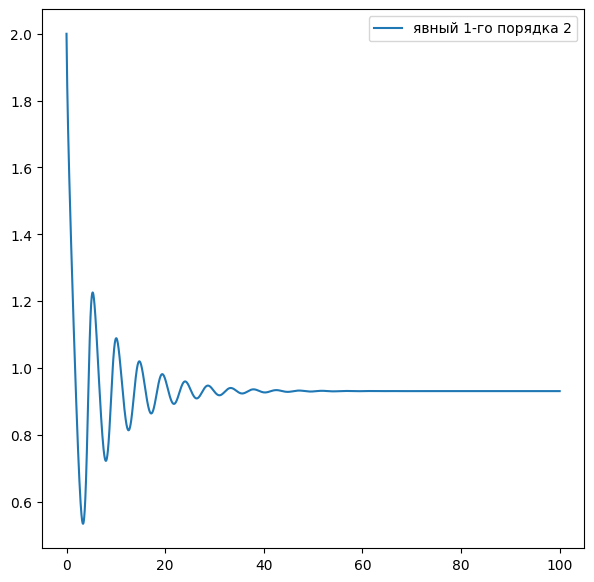

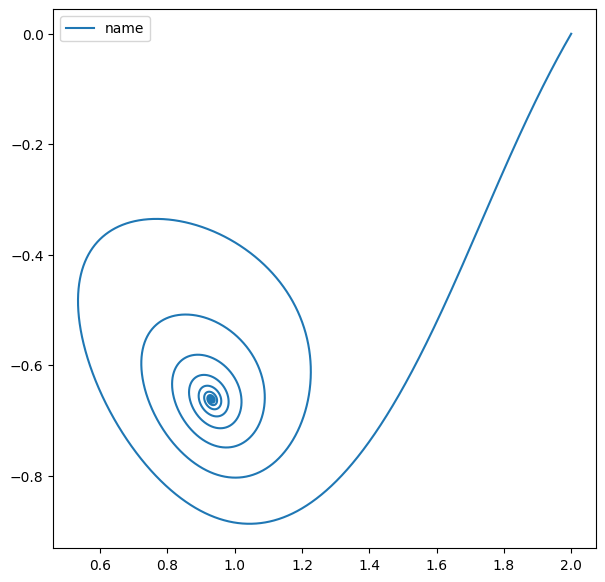

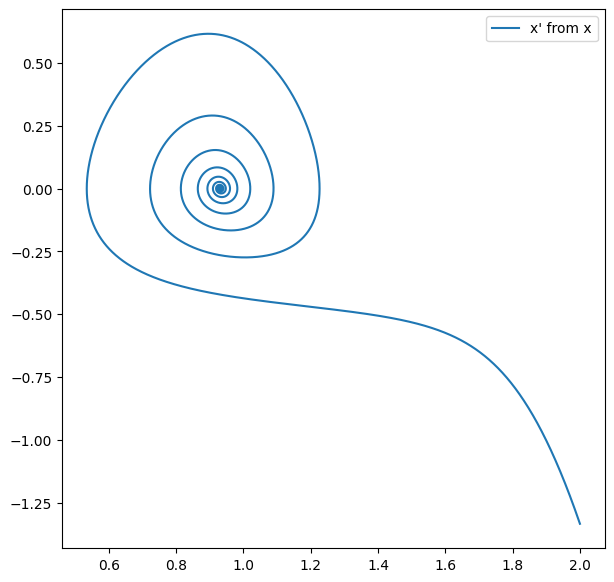

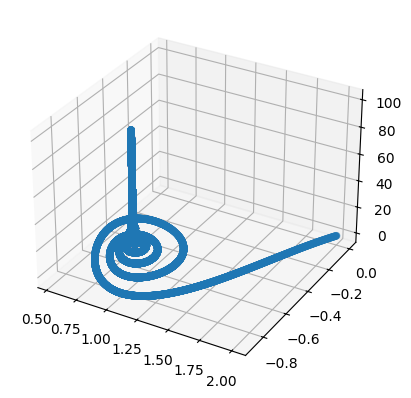

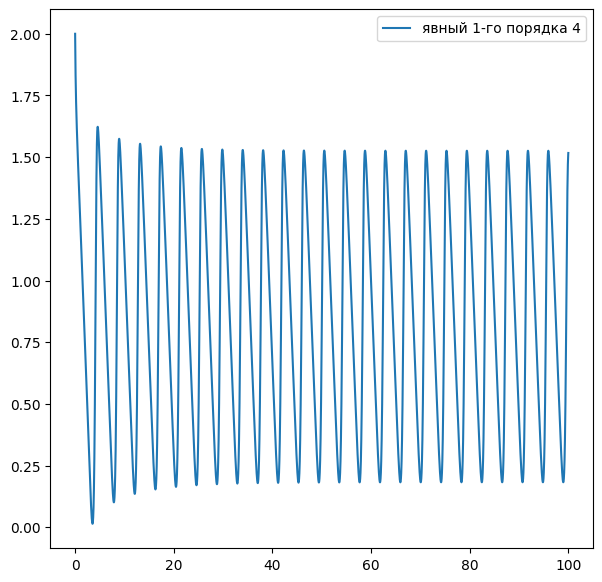

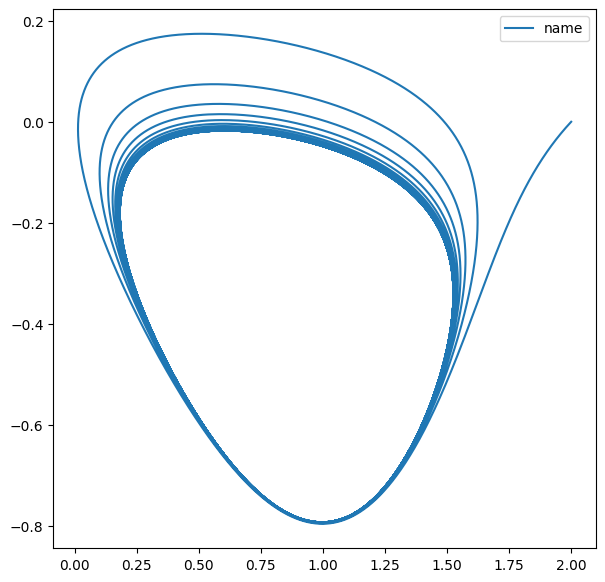

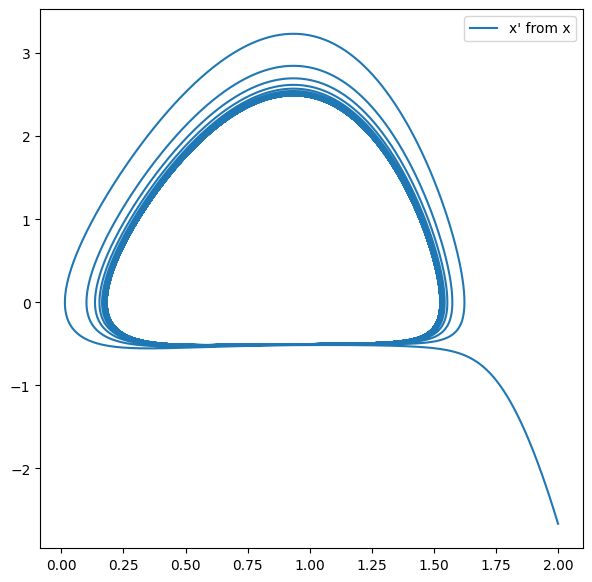

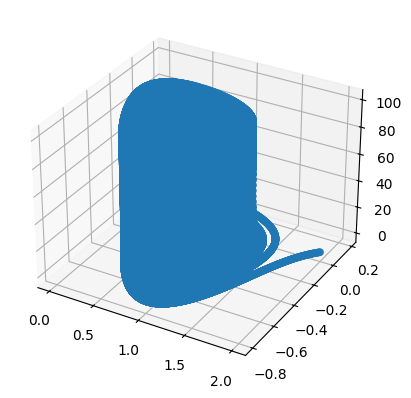

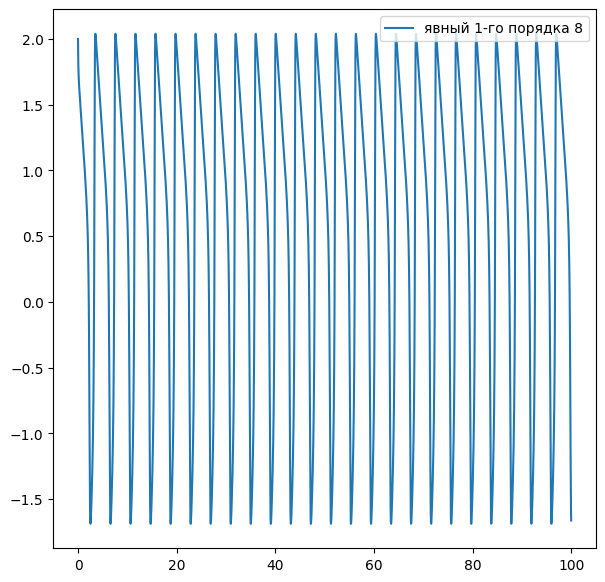

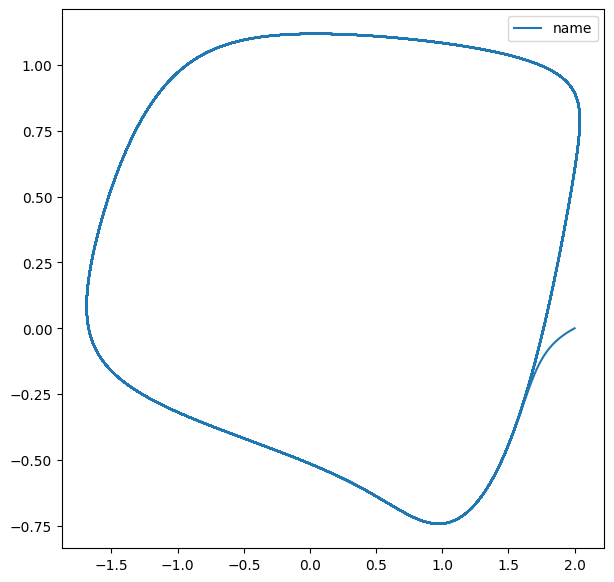

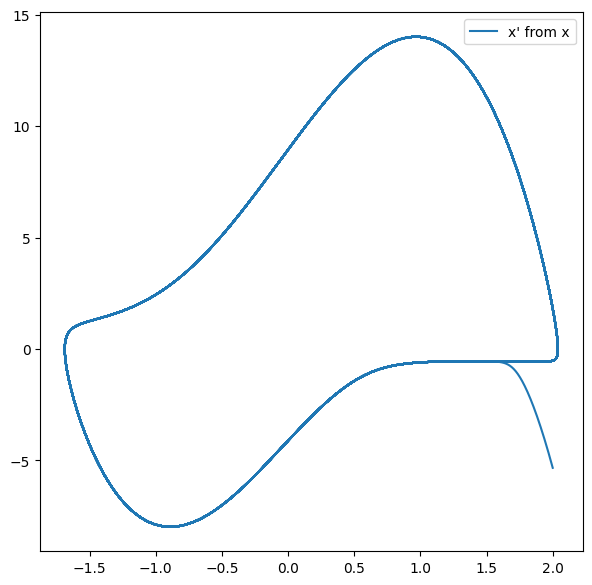

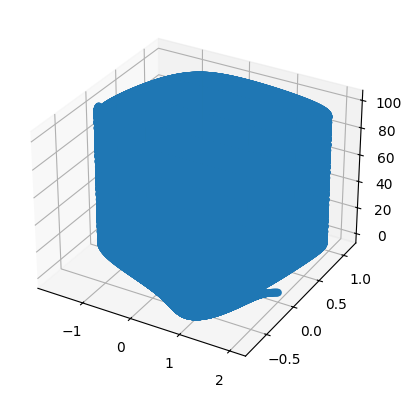

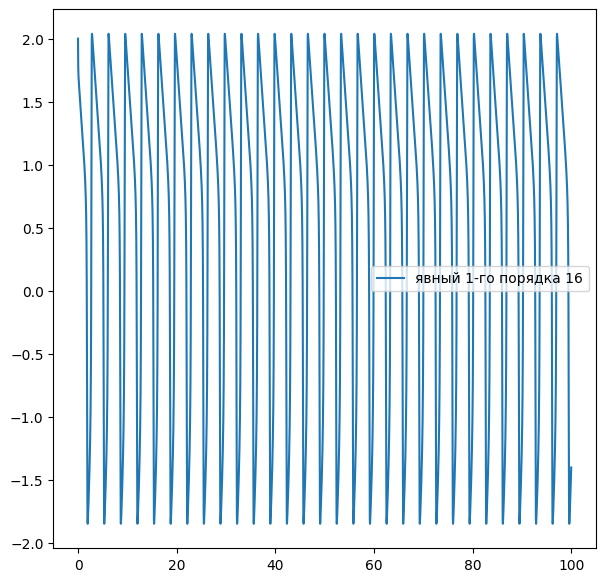

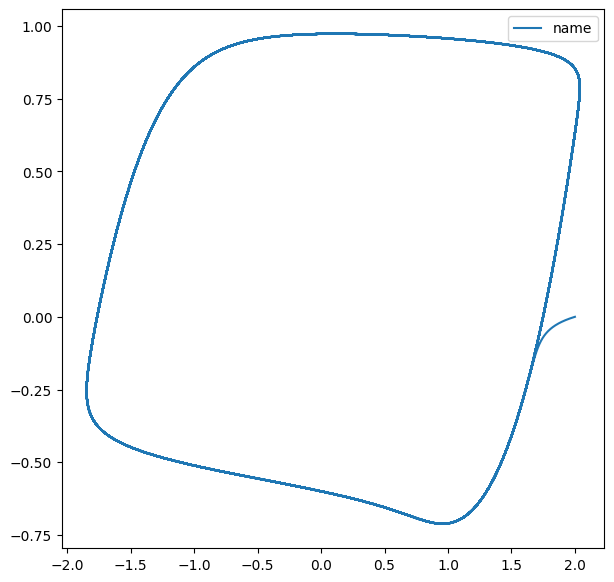

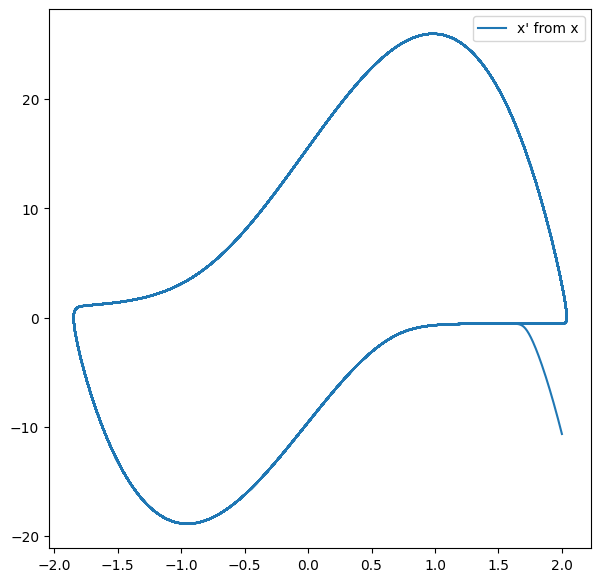

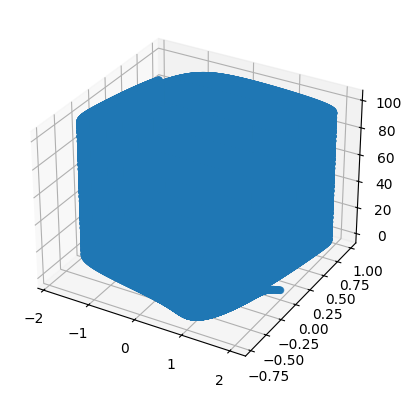

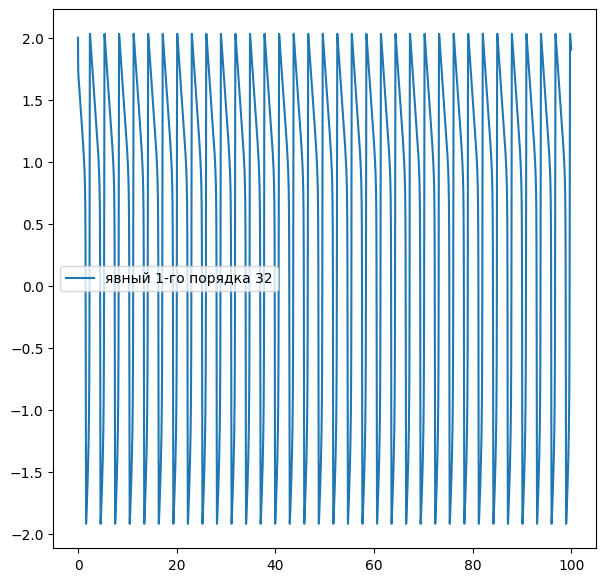

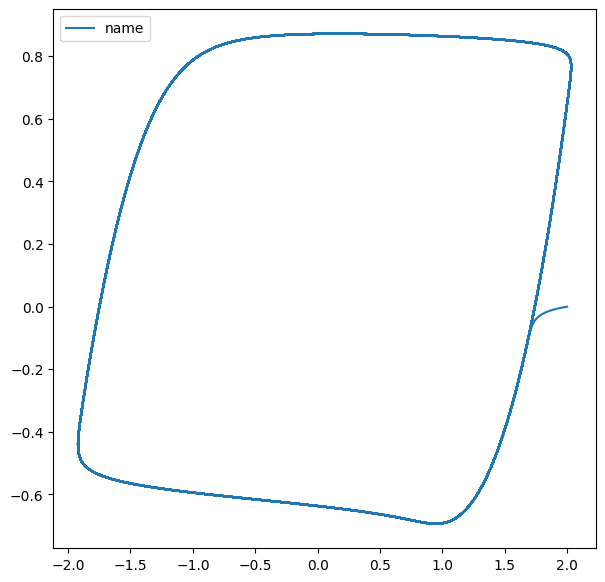

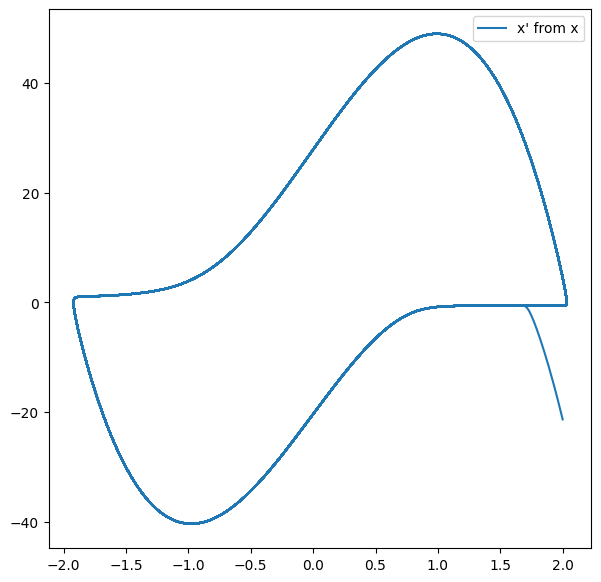

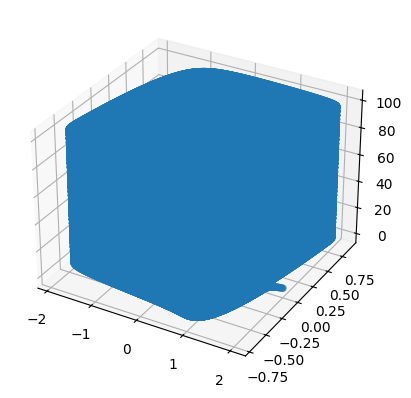

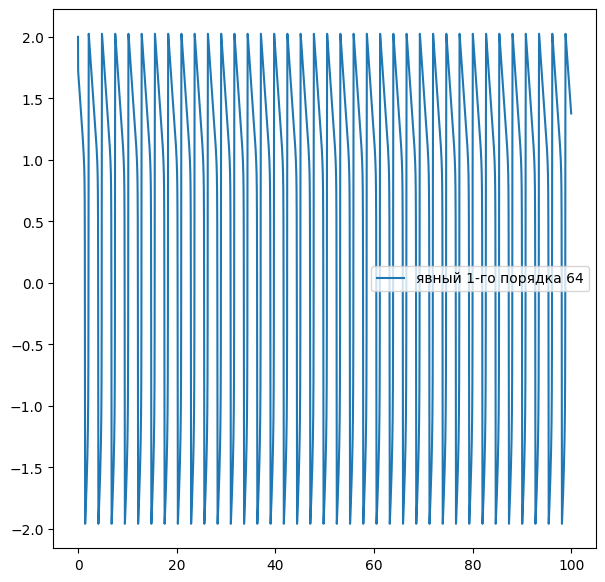

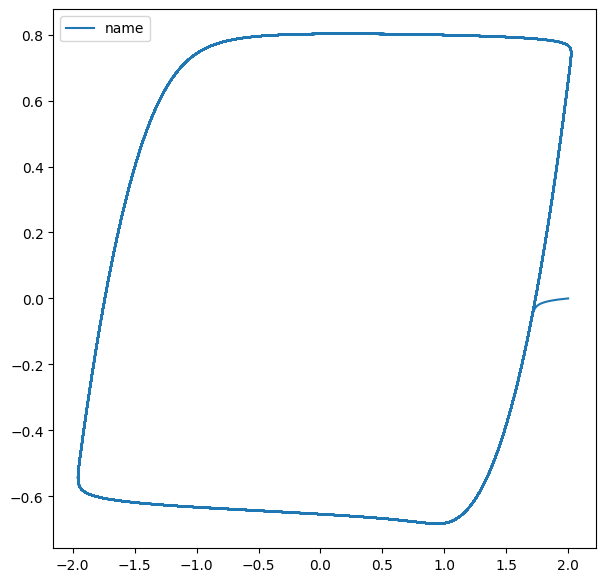

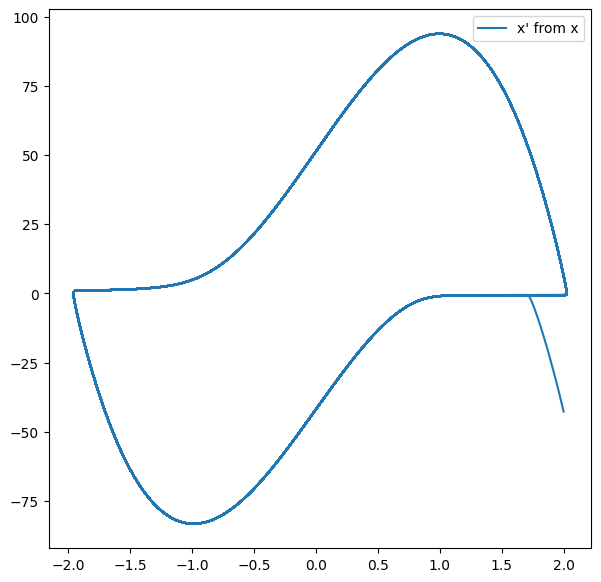

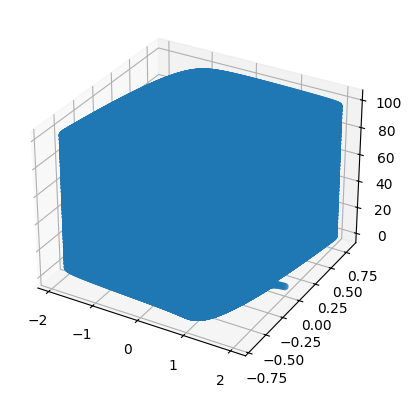

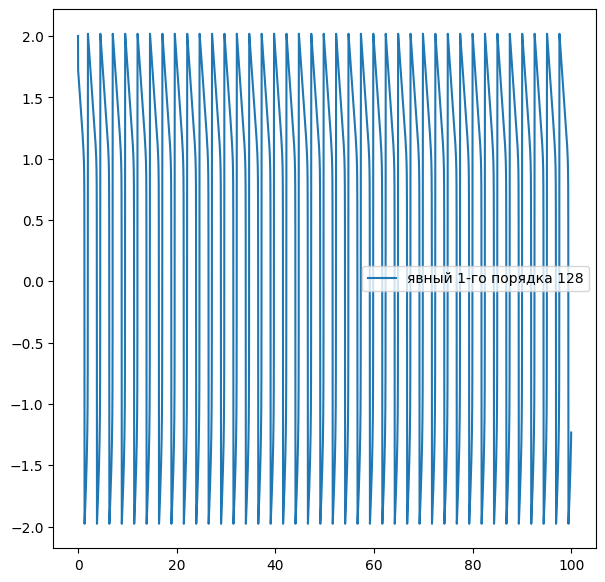

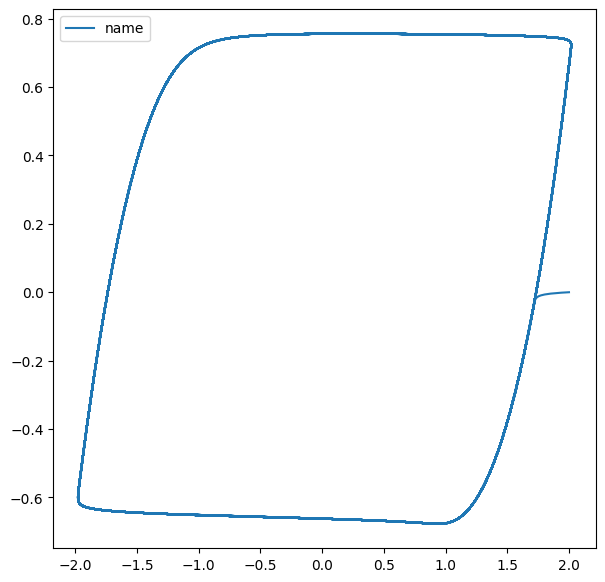

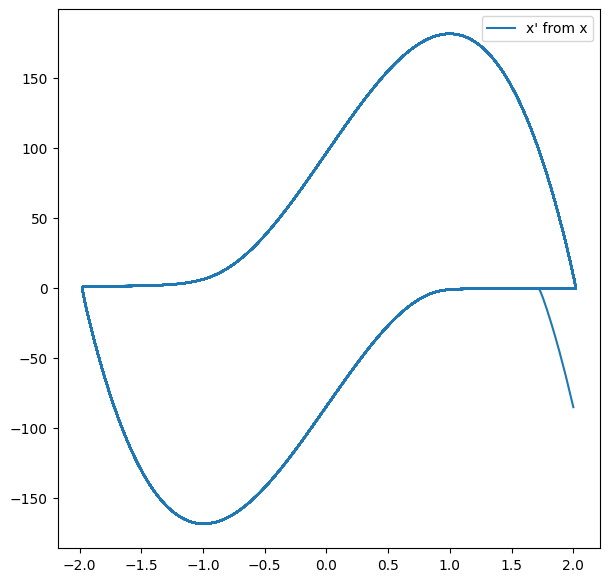

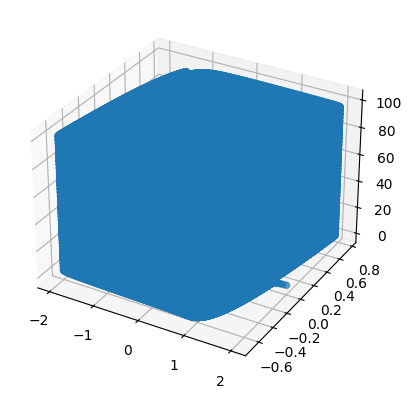

In [12]:
T0 = 0.01
T = 0.001
t_start = 0
t_finish = 100
a = 1
while a <= 200: 
    # a = 100
    # c = 0.59465
    c = 0.6
    b = 0.5
    # Первый элемент это x, второй y
    veriables = (T0, T, a, b, c)
    array0 = [(2, 0)]
    # array1 = do_method(explicit_method, t_start, t_finish, [t_start], [(2, 0)], veriables)
    array2 = do_method(implicit_method, t_start, t_finish, [t_start], [(2, 0)], veriables)
    arrayx2 = [i[0] for i in array2[1]]
    arrayy2 = [i[1] for i in array2[1]]
    arrayx2 = [i[0] for i in array2[1]]
    # arrayx2 = [i[0] for i in array2]
    # arrayx3 = [i[0] for i in array3]
    # arrayx4 = [i[0] for i in array4]

    # main_array.append(arrayx3)
    # print(len(array1[0]), len(array2[0]), len(arrayx1), len(arrayx2))
    # print(len(array2[1]))
    # array_dif_x3 = [[i[0] for i in array3_dif]]
    # draw(array1[0], [arrayx1], f"явный 1-го порядка {len(array1[0])}")
    draw(array2[0], [arrayx2], f"явный 1-го порядка {a}")
    # draw(arrayx2, [[i[0] for i in array2[2]]], "wow")
    draw(arrayx2, [arrayy2], "name")
    draw(arrayx2, [[i[0] for i in array2[2]]], name="x' from x")
    fig = plt.figure()
    # x = np.reshape(arrayx1, (len(), 12))
    # y = np.reshape(arrayy1, (9, 12))
    # z = np.reshape(array1[0], (9, 12))
    ax = fig.add_subplot(111, projection='3d')
    # ax.plot_surface(x, y, z)
    ax.scatter(arrayx2, arrayy2, array2[0])
    # ax.set_xlabel('x')
    # ax.set_ylabel('y')
    # ax.set_zlabel('z')
    # draw(px1, tl, arrayx2, "неявный 1-го порядка")
    # draw(tl, [arrayx3], f"{a}, {c} рунге-кутты")
    # draw(tl, array_dif_x3, f"{a} x' from t")
    # draw(arrayx3, array_dif_x3, "x' from x")

    a *= 2